This code is just example of how you can import binvox file to python uding "Binvox_rw_py" library. 


In [1]:
import binvox_rw

# Import the binvox file

In [2]:
with open('Model.binvox', 'rb') as f:
    model = binvox_rw.read_as_3d_array(f)

In [3]:
# Extract the voxilized file dimension
model.dims

[32, 32, 32]

In [4]:
# What was the scale of the model before normalizing it to 1 * 1 * 1 cube.
model.scale

10.0

In [6]:
# Did the file needed to be translated to center or not 
model.translate

[0.0, 0.0, 0.0]

In [5]:
# example of the model with translation
with open('Model_offset.binvox', 'rb') as f:
    model_offset = binvox_rw.read_as_3d_array(f)

In [6]:
model_offset.scale

100.0

In [8]:
model_offset.dims

[32, 32, 32]

In [9]:
model_offset.translate

[-30.0, -30.0, 0.0]

In [23]:
model.data

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, False,  True],
        ...,
        [ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, False,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, False,  True],
        ...,
        [ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, Fal

# Visualize with matplotlib


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:

def plot_voxels(voxels):
    """Plots a binvox voxel grid with better visuals using matplotlib."""
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Get indices of occupied voxels
    x, y, z = np.where(voxels)

    # Create a voxel grid with the same shape as the input
    filled = np.zeros(voxels.shape, dtype=bool)
    filled[x, y, z] = True

    # Plot using voxels
    ax.voxels(filled, facecolors='red', edgecolors='black', alpha=0.6)

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Voxel Visualization')

    plt.show()



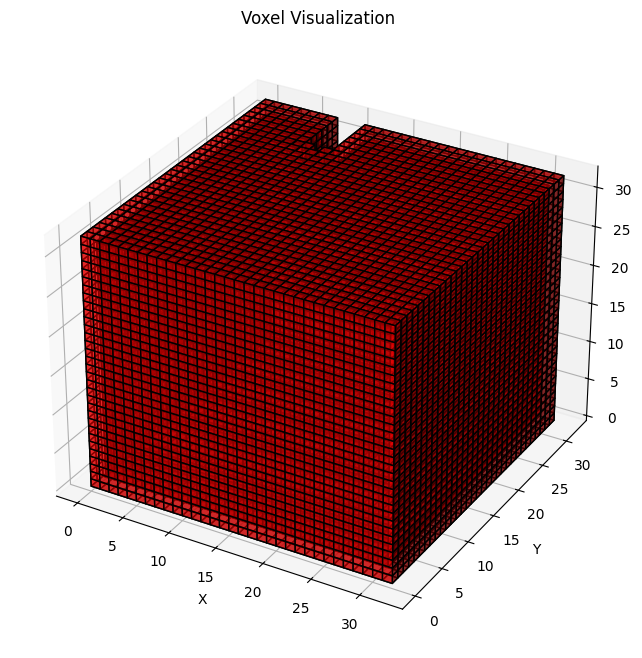

In [16]:
# Example usage (assuming 'voxels' is your 3D numpy array)
plot_voxels(model.data)


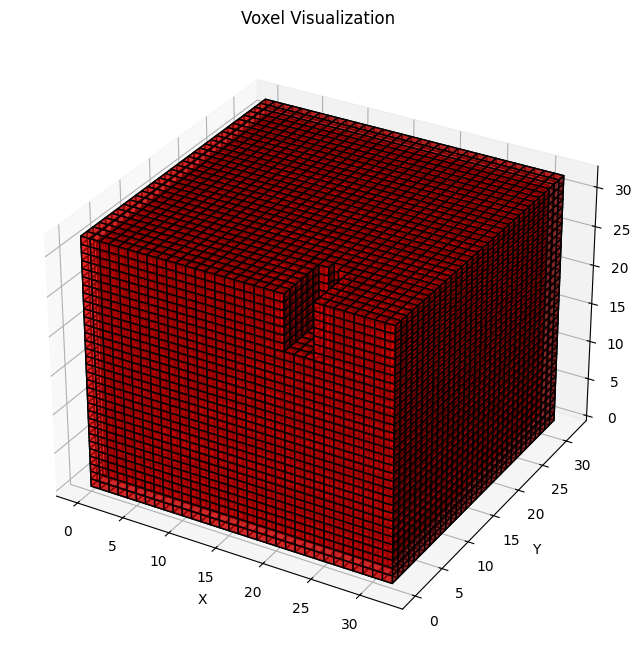

In [17]:
rotated_data = np.rot90(model.data, k=2, axes=(0, 1))  
# Example usage (assuming 'voxels' is your 3D numpy array)
plot_voxels(rotated_data)